In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
data=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()  # Basic info about columns and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.duplicated()
data.drop_duplicates(inplace=True)
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


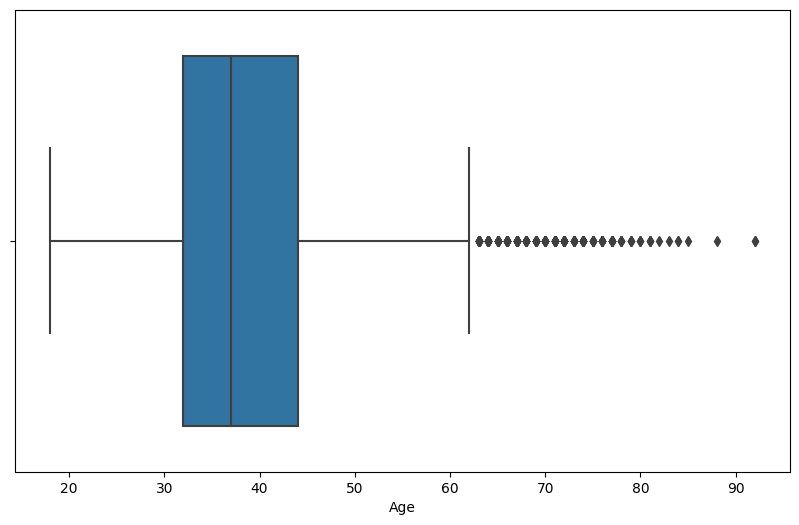

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age')
plt.show()



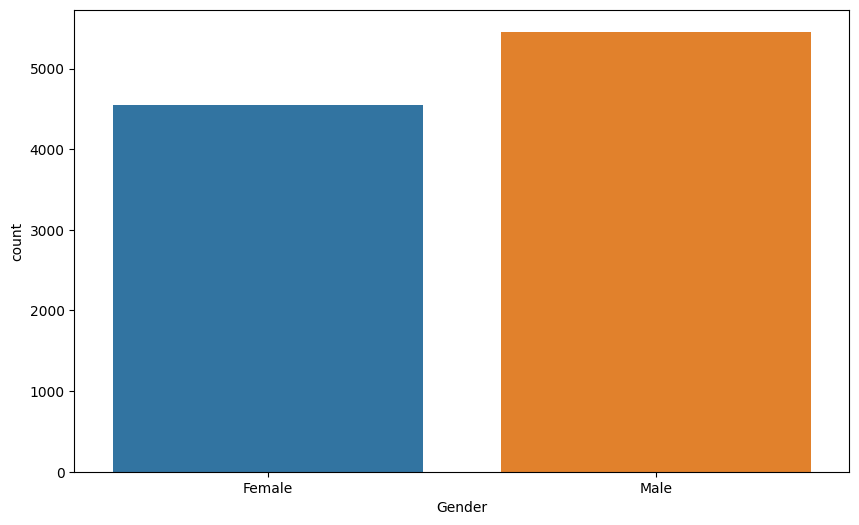

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender')
plt.show()


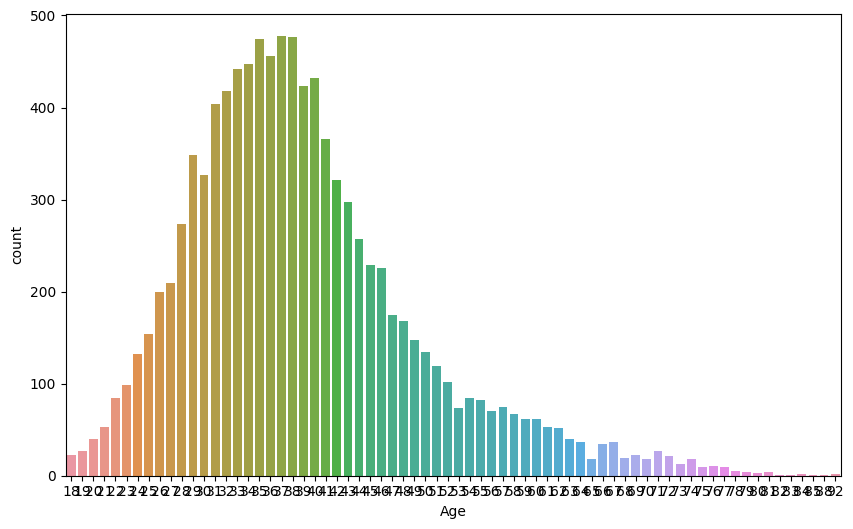

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age')
plt.show()


<Axes: xlabel='NumOfProducts', ylabel='count'>

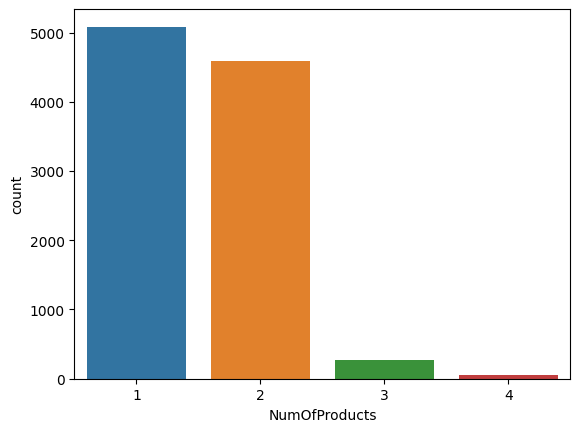

In [12]:
sns.countplot(data=data,x='NumOfProducts')


<Axes: xlabel='HasCrCard', ylabel='count'>

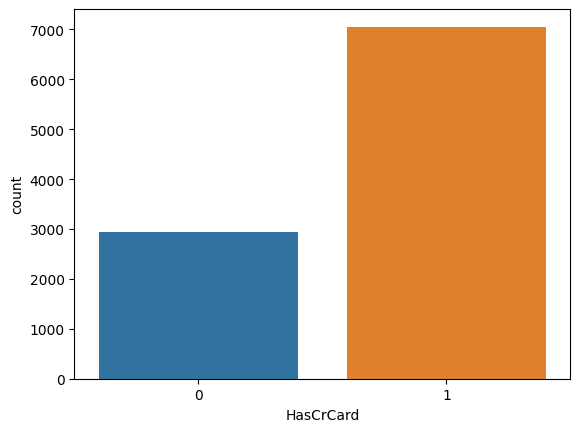

In [13]:
sns.countplot(data=data,x='HasCrCard')


<Axes: xlabel='IsActiveMember', ylabel='count'>

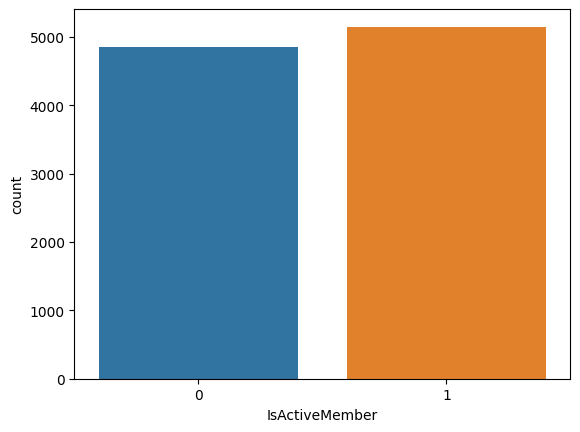

In [14]:
sns.countplot(data=data,x='IsActiveMember')


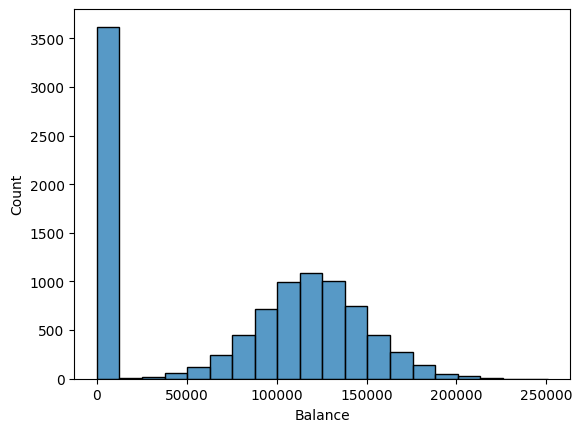

In [15]:
sns.histplot(data=data, x='Balance', bins=20)  
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Geography_encoded'] = le.fit_transform(data['Geography'])
data['Gender_encoded'] = le.fit_transform(data['Gender'])
data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [17]:
data.nunique()


CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Geography_encoded       3
Gender_encoded          2
dtype: int64

In [18]:
data1 = data.copy()
data1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [19]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Assuming x are features and y are labels
X = data.drop('Exited', axis=1)
y = data['Exited']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
os = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = os.fit_resample(X_train, y_train)

# Undersampling 
us = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = us.fit_resample(X_train, y_train)
data




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


**BALANCING DATA**

In [20]:
print("Original Data:")
print(y.value_counts())

print("\nOversampled Data:")
print(y_train_over.value_counts())

print("\nUndersampled Data:")
print(y_train_under.value_counts())


Original Data:
Exited
0    7963
1    2037
Name: count, dtype: int64

Oversampled Data:
Exited
0    6356
1    6356
Name: count, dtype: int64

Undersampled Data:
Exited
0    1644
1    1644
Name: count, dtype: int64


**FEATURE SCALING**

In [21]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['number']).columns

scaler = StandardScaler()


X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])


X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


# FEATURE ENGINEERING

In [22]:
#SPLIT TRAIN,TEST DATA

In [23]:
df_train = data.sample(frac=0.8,random_state=200)
df_test = data.drop(X_train.index)
print(len(X_train))
print(len(X_test))


8000
2000


(-1.0, 5.0)

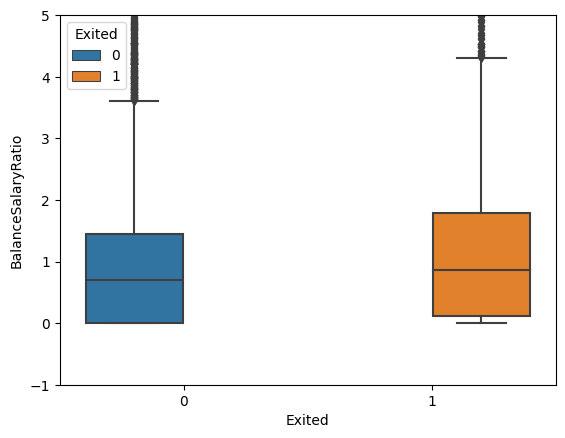

In [24]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

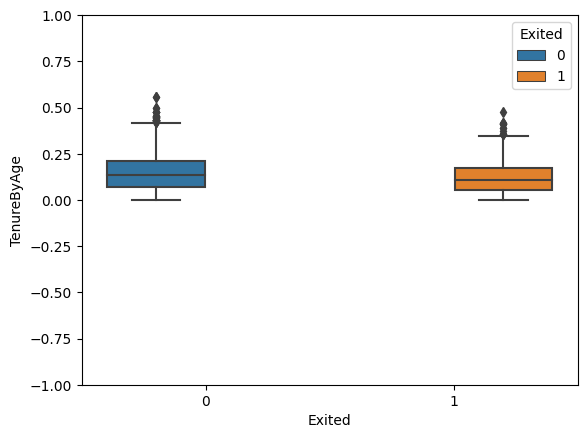

In [25]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [26]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [27]:
#Model fitting and selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [29]:
# Define features and target
X_train = data.drop(['Exited', 'Geography', 'Gender'], axis=1)
y_train = data['Exited']

# Perform GridSearchCV
param_grid = {'C': [0.1, 0.5, 1, 10, 50, 100], 'max_iter': [250], 'fit_intercept': [True], 'intercept_scaling': [1],
              'penalty': ['l2'], 'tol': [0.00001, 0.0001, 0.000001]}

log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})